<a href="https://colab.research.google.com/github/ericasrafael/project_IA_sales/blob/main/DS_project_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Criar um modelo de previsão de vendas baseado nos dados de investimento nos diferentes canais (TV, radio, jornais).
 * O modelo mostra uma tabela de investimentos e das vendas relacionadas a este investimento


 

In [3]:
# obtenção de dados de fontes externas 

import pandas as pd
url = '/content/advertising.csv'
dados = pd.read_csv(url)
display(dados)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
# ajustes de dados
# todos os valores em float
# todos non-null ( preenchidos )

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# análise exploratória

import matplotlib.pyplot as plt
import seaborn as sns

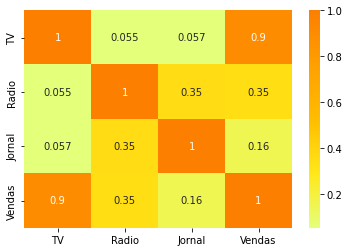

In [6]:
sns.heatmap(dados.corr(), cmap='Wistia', annot=True)
plt.show()

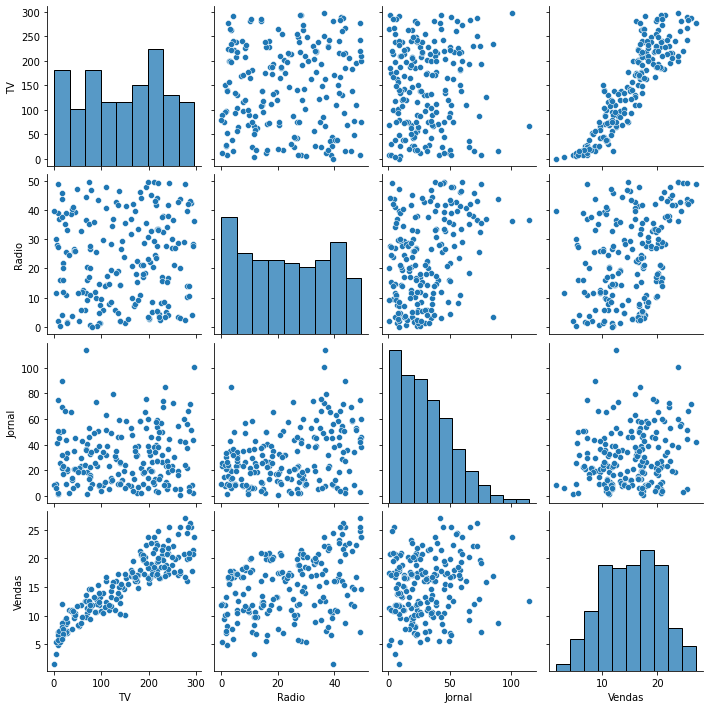

In [7]:
# percebendo relação entre as variáveis
# tv X vendas existe uma correlação positiva, e pelo gráfico acima, cerca de 0.9 em correlação, quase 100%
# ou seja, quanto mais se investe em TV mais vendas se obtém
sns.pairplot(dados)
plt.show()

In [8]:
# identificando os inputs(x) e outputs(y) do modelo
# os inputs são valor do investimento nos diferentes canais e o output será a venda prevista dado os inputs informados

from sklearn.model_selection import train_test_split

x = dados[['TV','Jornal','Radio']]
y = dados[['Vendas']]

In [5]:
# também poderia ser assim:
# x = dados.drop('Vendas',axis=1)
# Indica que todo o dataframe com exceção da coluna ‘Vendas’ irão compor os valore de X (inputs)

In [9]:
# iniciando o treinamento da IA

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np 

In [10]:
# treinar modelo, testar modelo, separando variáveis para tais fatores, e fornecê-las para a IA

xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size=0.25) # 25% dos dados, aleatoriamente, foram escolhidos para teste, e 75% para teino

# treino

reg_linear = LinearRegression()
reg_linear.fit(xtreino,ytreino)

rd_forest = RandomForestRegressor()
rd_forest.fit(xtreino,ytreino)

# teste
# retorna um array com cada y relacionado a cada input x
# y calculado pelo modelo deve ser com parado a cada yteste da dataframe original, assim, quanto mais similar, melhor o modelo.

test_pred_reg_linear = reg_linear.predict(xteste)
test_pred_rd_forest = rd_forest.predict(xteste)

# Existem 2 indicadores que descrevem bem os resultados dos testes: R² e RSME, qual o teste mais válido:
# Obteve-se que o R² da árvore de decisões é maior que o da regressão linear

r2_lin = metrics.r2_score( yteste, test_pred_reg_linear )
rmse_lin = np.sqrt(metrics.mean_squared_error(yteste,test_pred_reg_linear ))

r2_rf = metrics.r2_score( yteste, test_pred_rd_forest )
rmse_rf = np.sqrt(metrics.mean_squared_error(yteste,test_pred_rd_forest ))

print(f'R² da Regressão Linear vale: {r2_lin}')
print(f'RSME da Regressão Linear vale: {rmse_lin}')

print(f'R² da Àrvore de Decisões vale: {r2_rf}')
print(f'RSME da Àrvore de Decisões vale: {rmse_rf}')

R² da Regressão Linear vale: 0.8765410659085088
RSME da Regressão Linear vale: 1.651579105545683
R² da Àrvore de Decisões vale: 0.9336191378909553
RSME da Àrvore de Decisões vale: 1.2110429967594027


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


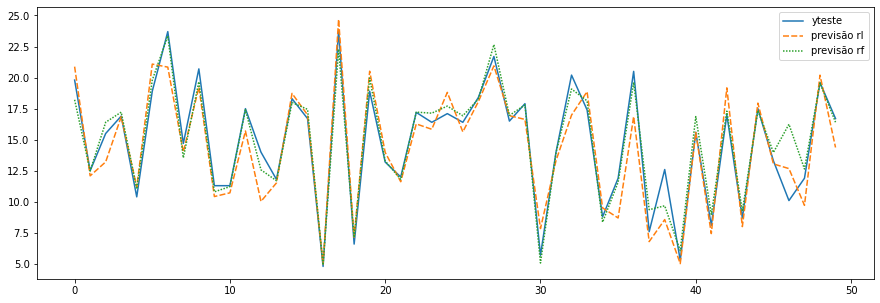

,yteste,previsão rl,previsão rf
0,19.8,20.879743,18.213
1,12.5,12.091369,12.483
2,15.5,13.214762,16.405
3,16.9,16.851810,17.218
4,10.4,11.182205,11.031
5,18.9,21.086543,19.791
6,23.7,20.842167,23.356
7,14.7,14.001708,13.543
8,20.7,19.233227,19.661
9,11.3,10.425219,10.807


In [11]:
# dataframe apenas com os resultados calculados e os dados de teste
resultado = pd.DataFrame()
resultado['yteste'] = yteste
resultado['previsão rl'] = test_pred_reg_linear
resultado['previsão rf'] = test_pred_rd_forest
resultado = resultado.reset_index(drop=True)
figura = plt.figure(figsize=(15,5))
sns.lineplot(data=resultado)
plt.show()
display(resultado)

# 0,25 x 200 = 50 pontos
#O gráfico mostra todos os 50 pontos de teste que são dados reais, extraídos da nossa base ao lado das duas curvas geradas pelos nossos modelos

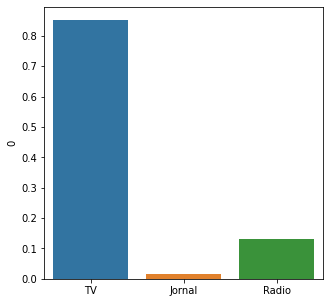

In [12]:
# obtivemos que a arvore de escolhas foi o modelo com melhor eficácia da predição, com  R² chegndo a 96%
# pode-se perceber que em termos de importância para o modelo via Random Forest:
# O investimento em TV é ~85% relevante;
# O Rádio , pouco mais de 10%;
# Jornal não chegando a mais de 5% de relevância

importancia = pd.DataFrame( rd_forest.feature_importances_ , xtreino.columns )
plt.figure(figsize=(5, 5))
sns.barplot(x=importancia.index, y=importancia[0])
plt.show()

In [ ]:
# conslusão: aumentar o investimento em TV